# Final Exam - MNIST (35%)

In this final assignment, you will use all the topics that you learnt throught the course, but specially:

* Training a Machine Learning model
* Optimizers (Variations of Gradient Descent)
* Defining the Architecture of a Neural Network
* Regularization Methods (Dropout)
* Evaluating a Neural Network (Loss and Accuracy)

**Deadline:** May 17th 11:59 PM (Finnish Time)

**Author:** Andrés Felipe Zapata Palacio  

**Tasks:**  
* #1 Find Optimal Dropout Rate **(25 points)**
* #2 Redefine your architecture **(25 points)**
* #3 Find best Optimizer **(25 points)**
* #4 Evaluate your model using handwritten digits made by you **(25 points)**

**Important Notes** ⚠️
 
* You are allowed to modify only the parts of the code that are delimited by the commentaries. These sections usually have a commentary that says: "Write your code here".

* For the open questions, you have to explain your opinion or decision in detail. You must demonstrate that you dominate the topics of the course with your answer.

* Upload the Notebook in Moodle using the format ipynb, you must export the notebook without removing the outputs from the cells.

* Verify that your notebook runs without errors before submitting it in Moodle

**Name of the Student (Penalization of 5 points)** ⚠️

One requirement for this assignment is to change the name of the file before uploading it to the system E.j (NLP_04_Lab_Andres_Zapata.ipynb). Additionally, you have to write your name in the space bellow:

```
riifo
```

If you don't do these two steps, your final score will be reduced in 5 points.



## ☑️ Pre-Task 1 (0 Points)

Load the dependencies and the dataset of hand-written images. You can also explore the different images to get familiarized with the structure of the dataset.

In [1]:
import keras
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test,10)

11501568/11490434 [==============================] - 0s 0us/step


##☑️ Task 1 (25 Points)

**🎯Task:** Use Dropout layers after each Hidden Layer (DON'T add Dropout in the input layer or in the output layer). You must find the optimal value for dropout rate. You must explain your observations in the respective space for the answer at the end of the exam.

Remember that Dropout Rate specifies the probability of **dropping** a neuron in each iteration. For this reason, it must be a value between 0 and 1. So a dropout rate of 0.5 means that there is a 50% of probability of dropping each neuron, in other words, it's expected that half of the neurons (in average) are deactivated in each iteration. 

**🧩Hint:** Every time that you increase or decrease the Dropout rate, you must readjust the architecture of the neural network. If you increase the Dropout rate, the difference between the Training and the Test metrics is going to be smaller, but at the same time, its expected that both accuracies decrease together. For this reason, if you increase the Dropout rate you must increase also the complexity of the model. You must add more neurons or more layers. Regularization reduces overfitting but at the same time reduces model complexity, so you must increase the complexity manually in the architecture definition.

For each Dropout rate there is a unique optimal architecture, you must find it, or get very close to it.

**Example of Dropout usage in Keras:**

```
from keras.layers import Dense, Input, Dropout

layers = [
  Input(inputSize)
  Dense(numberOfNeuronsForFirstHiddenLayer)
  Dropout(dropoutRateOfHiddenLayer)
  Dense(outputSize)
]
```

##☑️ Task 2 (25 Points)

**🎯Task:** Redefine the architecture of your Neural Network. Adjust the number of layers, the activations, and the number of neurons of each layer.
The objective is to get the highest Test Accuracy, preventing the overfitting. Additionally, you must describe your architecture in your own words.

Now that you can use regualization methods, such as L2, L1 and Dropout, you should try to get a better version of your neural network. Make the model more complex and try to get the best possible Test Accuracy (regularization will help you getting a better test accuracy, but you need to increase the complexity also).


**NOTE 💥:** Integrating L1 or L2 Regularization can make it more difficult to train the model, because you are adding one more hyperparameter to tune (beta), but if you want to get even better results in the loss, you can integrate them. This is completly OPTIONAL but can give BONUS points if it's implemented correctly.

```
beta = 0.01
layer = Dense(32, kernel_regularizer=l2(beta), bias_regularizer=l2(beta))
```

##☑️ Task 3 (25 Points)

**🎯Task:** Try different optimizers and find the most optimal for your network. Remember that you must fit the different hyperparameters. Depending on the optimizer that you use, you will have different hyperparameters available.

It's recommended that you focus on testing the following three optimizers:

* Adadelta - [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adadelta)

* RMSProp - [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop)

* Adam - [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

Nevertheless, if you want to explore more optimizers, you can go to the official documentation of [tf.keras.optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). In that page, you can find other optmizers, such as Nadam, Adamax, or the traditional Stochastic Gradient Descent.

In [3]:
from keras.layers import Flatten, Dense, Dropout

In [14]:
##############    WRITE YOUR CODE HERE    ##############

# Task 1: Set Dropout rate with values between 0 and 1
dropoutRate = 0.2

# Task 2 : Choose the optimal hyperparameters
kernel_initializer = ki = 'glorot_normal'
epochs = 20
batch_size = 50


# Task 1: Add Dropout layers after each Hidden Layer (DON'T DO IT FOR INPUT)
# Task 2: Adjust the number of layers and number of neurons
# Bonus Task: Add L1 or L2 Regularization and tune beta
layers = [
  Flatten(input_shape=(28, 28)),
  Dense(50, activation='relu', kernel_initializer=ki),
  Dropout(dropoutRate),
  Dense(10, activation='softmax', kernel_initializer=ki)
]

# Task 3 : Find best Optimizer and Tune its own hyperparameters
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

########################################################

In [15]:
model = tf.keras.models.Sequential(layers)
model.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test,y_test),
)

Epoch 1/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.4342 - accuracy: 0.8758 - val_loss: 0.2101 - val_accuracy: 0.9398
Epoch 2/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2323 - accuracy: 0.9327 - val_loss: 0.1507 - val_accuracy: 0.9553
Epoch 3/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1873 - accuracy: 0.9450 - val_loss: 0.1325 - val_accuracy: 0.9589
Epoch 4/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1634 - accuracy: 0.9507 - val_loss: 0.1193 - val_accuracy: 0.9637
Epoch 5/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1466 - accuracy: 0.9562 - val_loss: 0.1096 - val_accuracy: 0.9666
Epoch 6/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1351 - accuracy: 0.9589 - val_loss: 0.1044 - val_accuracy: 0.9674
Epoch 7/20
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1277 - accuracy: 0.9609 - val_loss: 0.0988 - val_accuracy:

Train Loss: 0.03
Test Loss: 0.09



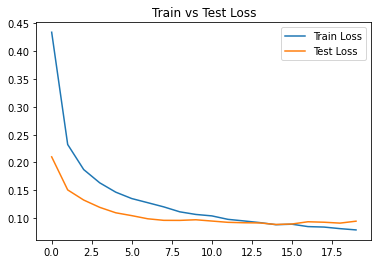

In [16]:
#@title Train vs Test Loss ⚠️
#@markdown ⚡ Run this cell to compare the train and test loss in each training epoch

plt.title('Train vs Test Loss')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()

trainLoss = model.evaluate(x_train, y_train, verbose=0)[0]
testLoss = model.evaluate(x_test, y_test, verbose=0)[0]

print(f'Train Loss: {trainLoss:.2f}')
print(f'Test Loss: {testLoss:.2f}')
print()

Train Accuracy: 99.06%
Test Accuracy: 97.36%



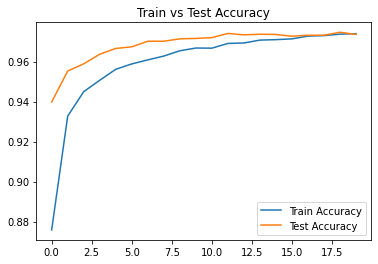

In [17]:
#@title Train vs Test Accuracy ⚠️
#@markdown ⚡ Run this cell to compare the train and test accuracy in each training epoch

plt.title('Train vs Test Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()

trainAcc = model.evaluate(x_train, y_train, verbose=0)[1]
testAcc = model.evaluate(x_test, y_test, verbose=0)[1]

print(f'Train Accuracy: {trainAcc*100:.2f}%')
print(f'Test Accuracy: {testAcc*100:.2f}%')
print()

⁉️ **Question Task 1** 🧐

* What do you observe for different dropout rates?
* Which are the most optimal ranges for this value?
* How did you have to modify the architecture of the network?

```
Switched he_normal to glorot_normal and tried changing the values until accuracy got better.
Changing dropout rate closer to zero was easiest for getting the accuracy up.
Got getting error about compatibility when trying numbers.

loss: 0.6109 - accuracy: 0.8048 - val_loss: 0.3635 - val_accuracy: 0.9015

NEW:
When changing values, especially when trying to change Dropout Dense to anything but 10, keep getting error:
"ValueError: Shapes (50, 10) and (50, 20) are incompatible"
That is one of the reasons I left it as 10 even though it is 10 in the original version and therefore should be then changed.
The only way I get it to run at all is to keep it at 10.


```

⁉️ **Question Task 2** 🧐

* What did you observe adding regularization (task 1) and changing the optimizer (task 3)? 
* How does that affect your architecture? Did you have to change it? How did you change it? 
* Did you get a better test accuracy making the network more complex and adding regularization methods?
* How did you change the architecture of the neural network compared to the first architecture (in the Partial Exam).

**Note:** You don't have to answer all these questions, they are just a guide for you to explain in the space down bellow your observations doing this task.

```
Tried with Adagrad and Adam which was originally there,
and Adagrad performed worse when it was the only thing changed.
Some of the things felt familiar to look at after having done these in the previous tasks,
I knew I wanted to go with glorot_normal at least and to keep the epoch small for the ease of running the code
multiple times to find differences, knowing it takes time.

NEW:
The new values give a better result than the effort first time around.
The graphs also look better, being more close together, which is a desirable direction.


```

⁉️ **Question Task 3** 🧐

* Which optimizers did you test?
* Did you observe any difference in the learning curve?
* Which parameters did you use in each optimizer?

```
Did a quick googling and read that Adam is supposed to be a really good optimizer so I wanted to keep it.
Other one I ran into would have been Adagrad. With Adagrad the first graph slopes
softly down and the train and test values are overall closer together.
With Adam the first graph drops sharply and the two lines are only loosely parallel and the second graph is even worse, very spaced out.
The graphs are not optimal since the lines are not close together.

NEW:
When I say I googled I do also mean that I did google for the "official documentation"
and cross reference it with some real life use cases to gain a better understanding.
Perhaps I should have screen captured or written down all of the different combinations used,
since in the final version there's only the one that worked best, but it doesn't show the effort.
```

##☑️ Task #4 Test the model (25 Points)

**🎯Task:** You must draw each digit one time, save them as a PNG files with a resolution of 28x28, and evaluate the model using your digits. There is a cell down bellow that will help you uploading the files and showing the predictions.

To draw your own digits you must follow these steps:

1. Open https://www.pixilart.com/draw
2. Click on **File**, then on **New**
3. Set width and height equal to 28 (MNIST digits are images of dimensions 28x28)
4. Click on **New Drawing**
5. Select the bucket 🪣 in the left column (set of tools) and fill the whole background using the **black** color.
6. Select the pencil ✏️ in the left column (set of tools) and draw the digits you want, using the **white** color.
7. Once your digit is ready, click on **Download** 📥, then on **''Download png, gif''**, and finally on **DOWNLOAD .PNG**.

**Note:** If you have any question about this procedure, and you didn't attend the last class, I recommend you to watch the recording. We explained this process during the session.

In [19]:
#@title Load Auxiliar Functions ⚠️
#@markdown ⚡ Run this cell to load all the auxiliar functions required for Task 4

import cv2

from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

def imageToArray(fileName):
  originalImage = cv2.imread(fileName)
  grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
  normalizedImage = grayImage / 255
  image = normalizedImage.reshape((28,28))
  return image

def printProbabilities(predictions):
  for i in range(10):
    prob = predictions[0][i] * 100
    if prob > 1:
      message = f'Digit {i}\t{prob:.0f}%'
      print(message)

def predictImages(uploaded):
  for fn in uploaded.keys():
    print(fn)
    image = imageToArray(fn)
    fig = plt.figure
    plt.imshow(image, cmap='gray')
    plt.show()
    ds = image.reshape((1,28,28))
    prediction = model.predict(ds)
    printProbabilities(prediction)
    print('***********************************')

Saving pixil-frame-7.png to pixil-frame-7.png
Saving pixil-frame-6.png to pixil-frame-6.png
Saving pixil-frame-5.png to pixil-frame-5.png
Saving pixil-frame-4.png to pixil-frame-4.png
Saving pixil-frame-3.png to pixil-frame-3.png
Saving pixil-frame-2.png to pixil-frame-2.png
Saving pixil-frame-0.png to pixil-frame-0.png
Saving pixil-frame-1.png to pixil-frame-1.png


_________________________________________________


pixil-frame-7.png


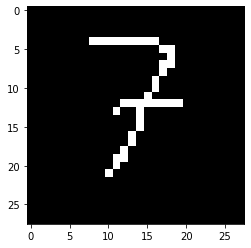

Digit 1	10%
Digit 2	50%
Digit 3	34%
Digit 8	6%
***********************************
pixil-frame-6.png


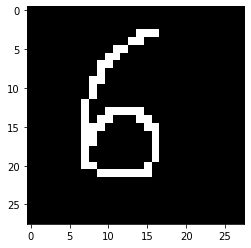

Digit 2	2%
Digit 5	31%
Digit 6	53%
Digit 8	13%
***********************************
pixil-frame-5.png


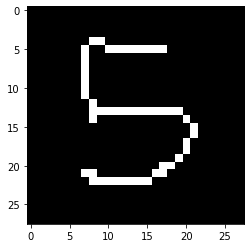

Digit 3	43%
Digit 5	56%
***********************************
pixil-frame-4.png


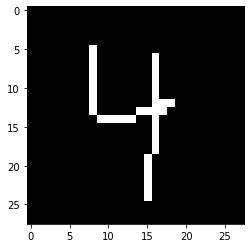

Digit 4	99%
Digit 9	1%
***********************************
pixil-frame-3.png


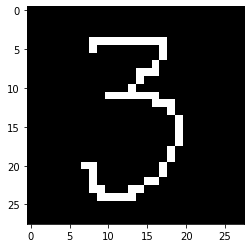

Digit 3	100%
***********************************
pixil-frame-2.png


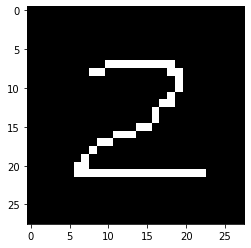

Digit 1	2%
Digit 2	79%
Digit 8	18%
***********************************
pixil-frame-0.png


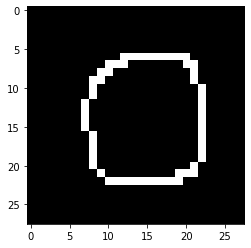

Digit 0	99%
***********************************
pixil-frame-1.png


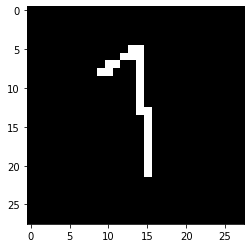

Digit 1	72%
Digit 3	7%
Digit 7	13%
Digit 9	7%
***********************************


In [20]:
uploaded = files.upload()
print('\n')
print('_________________________________________________')
print('\n')
predictImages(uploaded)

⁉️ **Question (Task 4)** 🧐

What do you observe from the digits written by you? Is the model intelligent enough to classify them correctly? Which digits are misclassified? Does that make sense? What can be the reason for this? Are your digits very different to the ones from the dataset? Did you try drawing your digits similar to the ones that are present in the test set?

**🧩Hint:** You should explore the Train and the Test dataset to know how are the digits that you use for testing and training. You can try drawing digits similar to the ones that are present in those datasets.

```
7 doesn't get recignized well at all, but it might also be from writing it with a horizontal line which is the oldschool way.
1 also is confused with 7.
Number 2 seems difficult to understand as well, for some reason suggested as 3.
When it does get it right it seems to get it right about 60% of the time, which for this not that great of a model is a quite nice success.

NEW:
There is significant improvement in recognition of the numbers when compared to the first model. Zero, three and four are nearly perfect.
Five and six get messed up with each other too much and the way I wrote seven seems to be too much as it was with the previous version,
however this time the problem with one and seven interchanging is eliminated to a plausible degree.
Overall it seems like a reasonably reliable network capable of learning.



```

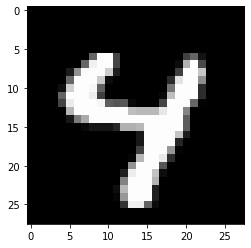

In [21]:
#@title Explore the dataset
#@markdown Run this cell to visualize a specific sample from Train or Test dataset

index =  1010#@param {type:"integer"}
dataset = "Test" #@param ["Train", "Test"]

if dataset == 'Train':
  data = x_train
else:
  data = x_test

if index >= len(data):
    print(f'Max index is for {dataset} data is {len(data)}')
else:
  sample = data[index]
  plt.imshow(sample, cmap='binary_r')